In [1]:
import os
import sys

def set_root_path():
    if os.getcwd().endswith('figures'): 
        os.chdir('../')
set_root_path()
sys.path.append('python/')
sys.path = [p for p in sys.path if "unbiased-inverse-volume-rendering" not in p]
print(os.getcwd())
print(sys.executable)
os.environ.pop("PYTHONPATH")

c:\Users\mayuf\source\repos\practical-inverse-rendering-of-textured-and-translucent-appearance
c:\Users\mayuf\anaconda3\envs\practical-inverse-rendering\python.exe


'C:\\Users\\mayuf\\source\\repos\\unbiased-inverse-volume-rendering\\mitsuba3\\build\\Release\\python'

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import gridspec
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import mitsuba as mi
import drjit as dr
import numpy as np

from practical_reconstruction import figutils
from practical_reconstruction import scene_configuration
from practical_reconstruction import io_utils
from practical_reconstruction import optimization_cli
from core import integrators
from core import bsdfs
from core import textures

mi.set_variant("cuda_ad_rgb")

from core import integrators
from core import bsdfs
from core import textures
from core import emitters

integrators.register()
bsdfs.register()
textures.register()
emitters.register()

In [3]:
def load_modified_scene(scene_config, res=[400, 240]):
  os.makedirs(scene_config.result_folder,exist_ok=True)

  tmp_mitsuba_xml = io_utils.mitsuba_remote_to_local(scene_config,override=True)
  scene = mi.load_file(tmp_mitsuba_xml)
  params = mi.traverse(scene)

  params.update()
  return scene

In [ ]:
def _update_light_position(params, camera_idx):
	# Update light position for the selected sensor
	light_positions = [
["7.500000 0.000000 0.000000 0.300000 0.000000 7.471460 0.043578 2.949549 0.000000 -0.653668 0.498097 -35.366814 0.000000 0.000000 0.000000 1.000000"],
["7.500000 0.000000 0.000000 0.300000 0.000000 6.797307 -0.211309 20.791639 0.000000 3.169639 0.453154 -32.220772 0.000000 0.000000 0.000000 1.000000"],
["7.328826 0.166872 0.105630 -7.094067 -0.000000 7.458747 -0.052370 9.665897 -1.593206 0.767620 0.485901 -34.513069 0.000000 0.000000 0.000000 1.000000"],
["7.328826 0.936738 0.085915 -5.714081 0.000000 6.066689 -0.293979 26.578505 -1.593207 4.309038 0.395215 -28.165070 0.000000 0.000000 0.000000 1.000000"],
["7.494684 0.133494 -0.016586 1.461014 0.000000 6.608728 0.236406 -10.548397 0.282341 -3.543571 0.440270 -31.318865 0.000000 0.000000 0.000000 1.000000"],
["7.494684 -0.008785 -0.018814 1.616954 0.000000 7.496369 -0.015558 7.089029 0.282341 0.233199 0.499404 -35.458252 0.000000 0.000000 0.000000 1.000000"],
["7.117022 -0.706185 -0.150544 10.838095 -0.000000 7.158140 -0.149236 16.446486 2.366009 2.124227 0.452841 -32.198891 0.000000 0.000000 0.000000 1.000000"],
["7.117022 -1.740655 -0.106836 7.778492 -0.000000 5.079865 -0.367846 31.749247 2.366009 5.235941 0.321365 -22.995522 0.000000 0.000000 0.000000 1.000000"],
["6.304254 -0.738532 0.266341 -18.343878 0.000000 7.375046 0.090889 -0.362262 -4.062806 -1.145979 0.413281 -29.429699 0.000000 0.000000 0.000000 1.000000"],
["6.304254 1.357971 0.255276 -17.569311 0.000000 7.068647 -0.167122 17.698559 -4.062805 2.107164 0.396112 -28.227808 0.000000 0.000000 0.000000 1.000000"],
["6.311899 1.645186 -0.246786 17.575043 0.000000 6.853625 0.203063 -8.214446 4.050918 -2.563432 0.384528 -27.416950 0.000000 0.000000 0.000000 1.000000"],
["6.311899 -0.426124 -0.268563 19.099396 0.000000 7.458390 -0.052596 9.681718 4.050917 0.663961 0.418459 -29.792107 0.000000 0.000000 0.000000 1.000000"],
["7.316449 0.928876 0.090842 -6.058943 -0.000000 6.197108 -0.281629 25.714031 -1.649113 4.121049 0.403030 -28.712067 0.000000 0.000000 0.000000 1.000000"],
["7.316449 1.485746 0.047709 -3.039629 -0.000000 3.254636 -0.450468 37.532768 -1.649113 6.591654 0.211666 -15.316587 0.000000 0.000000 0.000000 1.000000"],
["6.835326 -2.120719 0.149531 -10.167147 0.000000 5.449726 0.343514 -18.046011 -3.086798 -4.696066 0.331117 -23.678185 0.000000 0.000000 0.000000 1.000000"],
["6.835326 -0.715117 0.200188 -13.713159 -0.000000 7.295959 0.115835 -2.108429 -3.086798 -1.583536 0.443291 -31.530384 0.000000 0.000000 0.000000 1.000000"],
["5.221693 -0.906111 -0.353791 25.065395 -0.000000 7.393009 -0.084154 11.890759 5.383672 0.878849 0.343147 -24.520285 0.000000 0.000000 0.000000 1.000000"],
["5.221694 -3.438152 -0.276189 19.633202 -0.000000 5.771380 -0.319313 28.351904 5.383671 3.334709 0.267879 -19.251528 0.000000 0.000000 0.000000 1.000000"],
["4.966681 1.186354 0.366210 -25.334677 0.000000 7.330979 -0.105551 13.388588 -5.619793 1.048480 0.323650 -23.155512 0.000000 0.000000 0.000000 1.000000"],
["4.966681 3.773985 0.277602 -19.132124 0.000000 5.557178 -0.335776 29.504324 -5.619793 3.335386 0.245340 -17.673796 0.000000 0.000000 0.000000 1.000000"],
["6.495440 2.950367 -0.154267 11.098653 -0.000000 4.628530 0.393428 -21.539946 3.749567 -5.110973 0.267239 -19.206701 0.000000 0.000000 0.000000 1.000000"],
["6.495441 1.398094 -0.231944 16.536095 0.000000 6.959132 0.186434 -7.050390 3.749566 -2.421944 0.401801 -28.626080 0.000000 0.000000 0.000000 1.000000"],
["6.831079 -2.292678 -0.138724 10.010694 0.000000 5.040548 -0.370242 31.916969 3.096185 5.058310 0.306066 -21.924593 0.000000 0.000000 0.000000 1.000000"],
["6.831079 -3.025949 -0.043716 3.360124 0.000001 1.588426 -0.488658 40.206032 3.096186 6.676116 0.096450 -7.251517 0.000000 0.000000 0.000000 1.000000"],
["4.241152 -3.143757 0.355149 -24.560425 -0.000000 6.459154 0.254116 -11.788103 -6.185679 -2.155488 0.243504 -17.545313 0.000000 0.000000 0.000000 1.000000"],
["4.241152 -0.058958 0.412360 -28.565195 0.000000 7.499660 0.004766 5.666408 -6.185679 -0.040424 0.282731 -20.291143 0.000000 0.000000 0.000000 1.000000"],
["3.585440 1.807922 -0.422301 29.861053 0.000000 7.212013 0.137224 -3.605716 6.587459 -0.984020 0.229851 -16.589569 0.000000 0.000000 0.000000 1.000000"],
["3.585439 -1.601551 -0.425987 30.119108 0.000000 7.274970 -0.121561 14.509236 6.587460 0.871696 0.231857 -16.730024 0.000000 0.000000 0.000000 1.000000"],
["4.772033 3.920635 0.283677 -19.557381 -0.000000 5.515674 -0.338804 29.716280 -5.785993 3.233568 0.233964 -16.877499 0.000000 0.000000 0.000000 1.000000"],
["4.772033 5.522945 0.114984 -7.748850 0.000000 2.235684 -0.477269 39.408810 -5.785992 4.555084 0.094833 -7.138340 0.000000 0.000000 0.000000 1.000000"],
["7.172763 -2.072851 0.047364 -3.015504 -0.000000 2.431738 0.472989 -27.109219 -2.191226 -6.785274 0.155042 -11.352975 0.000000 0.000000 0.000000 1.000000"],
["7.172763 -1.439909 0.110114 -7.407963 0.000000 5.653363 0.328562 -16.999371 -2.191226 -4.713401 0.360447 -25.731258 0.000000 0.000000 0.000000 1.000000"],
["3.266159 -3.596402 -0.380923 26.964638 -0.000000 6.347352 -0.266343 24.643972 6.751460 1.739834 0.184280 -13.399581 0.000000 0.000000 0.000000 1.000000"],
["3.266161 -5.971499 -0.210009 15.000658 -0.000000 3.499401 -0.442238 36.956642 6.751459 2.888839 0.101596 -7.611753 0.000000 0.000000 0.000000 1.000000"],
["2.297698 -0.342003 0.475411 -32.978809 -0.000001 7.491390 0.023952 4.323370 -7.139369 -0.110069 0.153004 -11.210276 0.000000 0.000000 0.000000 1.000000"],
["2.297696 3.269404 0.423119 -29.318298 -0.000001 6.667373 -0.228970 22.027905 -7.139369 1.052207 0.136174 -10.032196 0.000000 0.000000 0.000000 1.000000"],
["2.714157 5.183684 -0.312785 22.194952 0.000001 5.032897 0.370705 -19.949331 6.991663 -2.012302 0.121423 -8.999601 0.000000 0.000000 0.000000 1.000000"],
["2.714158 2.143316 -0.443669 31.356852 0.000001 7.138902 0.153277 -4.729356 6.991663 -0.832034 0.172232 -12.556242 0.000000 0.000000 0.000000 1.000000"],
["7.122634 2.323870 0.022872 -1.301074 0.000000 1.095397 -0.494638 40.624687 -2.349059 7.046257 0.069352 -5.354651 0.000000 0.000000 0.000000 1.000000"],
["7.486901 0.348905 0.018206 -0.974448 -0.000000 4.622736 -0.393730 33.561127 -0.443075 5.895641 0.307644 -22.035095 0.000000 0.000000 0.000000 1.000000"],
["2.099781 -5.825052 0.282132 -19.449261 0.000000 4.408278 0.404514 -22.315975 -7.200064 -1.698781 0.082279 -6.259549 0.000000 0.000000 0.000000 1.000000"],
["2.099781 -2.928650 0.438502 -30.395153 0.000000 6.851535 0.203377 -8.236372 -7.200064 -0.854093 0.127882 -9.451739 0.000000 0.000000 0.000000 1.000000"],
["1.080882 -0.334599 -0.494277 34.899403 -0.000000 7.492374 -0.022542 7.577931 7.421704 0.048731 0.071986 -5.538995 0.000000 0.000000 0.000000 1.000000"],
["1.080882 -3.996850 -0.416903 29.483231 0.000000 6.319522 -0.269268 24.848734 7.421704 0.582093 0.060717 -4.750194 0.000000 0.000000 0.000000 1.000000"],
["0.929983 3.678388 0.431301 -29.891064 -0.000001 6.519829 -0.247133 23.299314 -7.442119 0.459659 0.053896 -4.272741 0.000000 0.000000 0.000000 1.000000"],
["0.929984 6.420333 0.250905 -17.263325 0.000000 3.792840 -0.431351 36.194588 -7.442119 0.802300 0.031354 -2.694751 0.000000 0.000000 0.000000 1.000000"],
["-0.882609 7.263825 -0.109704 7.979250 0.000000 1.657068 0.487643 -28.135040 7.447886 0.860797 -0.013000 0.410026 0.000000 0.000000 0.000000 1.000000"],
["6.953786 2.408841 -0.096433 7.050293 -0.000000 3.861047 0.428653 -24.005733 2.809778 -5.961526 0.238657 -17.205980 0.000000 0.000000 0.000000 1.000000"],
["0.307662 -6.150860 -0.285363 20.275440 -0.000000 4.284057 -0.410403 34.728199 7.493687 0.252531 0.011716 -1.320118 0.000000 0.000000 0.000000 1.000000"],
["0.307663 -7.467027 -0.042103 3.247229 0.000001 0.632082 -0.498221 40.875481 7.493687 0.306568 0.001729 -0.621002 0.000000 0.000000 0.000000 1.000000"],
["-0.160660 -2.892458 0.461196 -31.983715 0.000001 6.919527 0.192875 -7.501244 -7.498279 0.061975 -0.009882 0.191711 0.000000 0.000000 0.000000 1.000000"],
["-0.160658 0.954026 0.495823 -34.407589 0.000001 7.439047 -0.063616 10.453142 -7.498279 -0.020440 -0.010623 0.243645 0.000000 0.000000 0.000000 1.000000"],
["-0.505623 3.712984 -0.433118 30.618282 -0.000000 6.511590 0.248097 -11.366772 7.482937 0.250887 -0.029266 1.548610 0.000000 0.000000 0.000000 1.000000"],
["-0.505622 -0.032849 -0.498858 35.220036 -0.000001 7.499928 -0.002195 6.153643 7.482937 -0.002219 -0.033708 1.859551 0.000000 0.000000 0.000000 1.000000"],
["-1.925925 6.375299 0.229941 -15.795859 0.000001 3.568785 -0.439766 36.783653 -7.248504 -1.693914 -0.061095 3.776662 0.000000 0.000000 0.000000 1.000000"],
["1.925925 -7.245727 -0.013375 1.236272 -0.000013 0.207587 -0.499808 40.986591 7.248504 1.925188 0.003553 -0.748767 0.000000 0.000000 0.000000 1.000000"],
["-2.942106 -6.619630 0.129521 -8.766449 0.000000 2.112106 0.479764 -27.583469 -6.898841 2.823032 -0.055236 3.366510 0.000000 0.000000 0.000000 1.000000"],
["-2.942105 -4.761363 0.332823 -22.997581 0.000000 5.427366 0.345084 -18.155895 -6.898842 2.030548 -0.141937 9.435571 0.000000 0.000000 0.000000 1.000000"],
["-1.549021 -2.774371 -0.452909 32.003601 0.000000 6.943335 -0.189034 19.232370 7.338292 -0.585635 -0.095603 6.192231 0.000000 0.000000 0.000000 1.000000"],
["-1.549021 -5.799491 -0.299751 21.282591 -0.000000 4.595350 -0.395153 33.660679 7.338292 -1.224199 -0.063274 3.929161 0.000000 0.000000 0.000000 1.000000"],
["-1.738145 1.189327 0.479881 -33.291691 -0.000000 7.399677 -0.081508 11.705523 -7.295811 -0.283344 -0.114326 7.502840 0.000000 0.000000 0.000000 1.000000"],
["-1.738146 4.629096 0.375945 -26.016165 0.000001 5.797002 -0.317243 28.207041 -7.295811 -1.102830 -0.089565 5.769528 0.000000 0.000000 0.000000 1.000000"],
["-3.400968 5.741309 -0.228238 16.276623 -0.000001 3.841195 0.429445 -24.061165 6.684566 2.921060 -0.116122 7.628573 0.000000 0.000000 0.000000 1.000000"],
["-3.400967 3.260339 -0.389037 27.532551 -0.000000 6.547412 0.243871 -11.070946 6.684566 1.658792 -0.197934 13.355353 0.000000 0.000000 0.000000 1.000000"],
["-6.635746 -3.161510 -0.099370 7.255907 -0.000001 3.198366 -0.452256 37.657909 3.495266 -6.002109 -0.188654 12.705755 0.000000 0.000000 0.000000 1.000000"],
["6.635745 3.483224 0.019327 -1.052862 0.000002 0.622048 -0.498277 40.879410 -3.495267 6.612882 0.036691 -3.068401 0.000000 0.000000 0.000000 1.000000"],
["-3.178397 -4.371010 0.346680 -23.967592 0.000001 5.741240 0.321719 -16.520317 -6.793217 2.045101 -0.162204 10.854267 0.000000 0.000000 0.000000 1.000000"],
["-3.178396 -1.185307 0.445934 -30.915377 0.000001 7.384950 0.087242 -0.106941 -6.793217 0.554580 -0.208643 14.104980 0.000000 0.000000 0.000000 1.000000"],
["-2.916623 1.124330 -0.454504 32.115303 0.000001 7.400044 0.081359 0.304843 6.909653 0.474588 -0.191850 12.929502 0.000000 0.000000 0.000000 1.000000"],
["-2.916622 -2.435084 -0.431090 30.476297 0.000000 7.018821 -0.176209 18.334618 6.909654 -1.027869 -0.181967 12.237666 0.000000 0.000000 0.000000 1.000000"],
["-4.294805 3.661346 0.329304 -22.751261 0.000002 6.025269 -0.297741 26.841841 -6.148549 -2.557474 -0.230021 15.601463 0.000000 0.000000 0.000000 1.000000"],
["-4.294806 5.640595 0.163141 -11.119838 -0.000001 2.984982 -0.458693 38.108524 -6.148549 -3.939997 -0.113955 7.476835 0.000000 0.000000 0.000000 1.000000"],
["-7.499684 0.063355 -0.001792 0.425472 0.000000 2.929983 0.460267 -26.218662 0.068824 6.903708 -0.195324 13.172678 0.000000 0.000000 0.000000 1.000000"],
["-7.499684 0.041424 -0.003664 0.556488 0.000001 5.989440 0.300936 -15.065552 0.068824 4.513855 -0.399279 27.449541 0.000000 0.000000 0.000000 1.000000"],
["-4.963970 -3.189996 -0.308638 21.904667 -0.000001 6.175848 -0.283697 25.858795 5.622188 -2.816527 -0.272504 18.575289 0.000000 0.000000 0.000000 1.000000"],
["-4.963969 -5.077404 -0.160955 11.566863 -0.000001 3.220711 -0.451551 37.608536 5.622189 -4.482965 -0.142111 9.447789 0.000000 0.000000 0.000000 1.000000"],
["-4.144962 -1.022679 0.411088 -28.476128 -0.000000 7.398932 0.081807 0.273499 -6.250543 0.678175 -0.272607 18.582497 0.000000 0.000000 0.000000 1.000000"],
["-4.144962 2.197490 0.390102 -27.007105 -0.000000 7.021218 -0.175784 18.304878 -6.250543 -1.457236 -0.258691 17.608335 0.000000 0.000000 0.000000 1.000000"],
["-5.083177 3.096819 -0.304200 21.594027 -0.000001 6.205755 0.280781 -13.654707 5.514645 2.854524 -0.280400 19.127966 0.000000 0.000000 0.000000 1.000000"],
["-5.083177 0.400423 -0.366673 25.967083 0.000001 7.480203 0.036305 3.458618 5.514645 0.369093 -0.337984 23.158871 0.000000 0.000000 0.000000 1.000000"],
["-7.326222 1.127744 0.076148 -5.030359 -0.000001 5.337012 -0.351292 30.590412 -1.605140 -5.147280 -0.347557 23.828972 0.000000 0.000000 0.000000 1.000000"],
["-7.326222 1.547765 0.028355 -1.684824 0.000001 1.987302 -0.482128 39.748951 -1.605140 -7.064351 -0.129417 8.559187 0.000000 0.000000 0.000000 1.000000"],
["-6.474771 -2.616503 0.182346 -12.464223 -0.000001 5.419583 0.345627 -18.193922 -3.785149 4.475716 -0.311916 21.334120 0.000000 0.000000 0.000000 1.000000"],
["-6.474771 -0.898362 0.245133 -16.859316 0.000000 7.285702 0.118669 -2.306857 -3.785149 1.536714 -0.419318 28.852243 0.000000 0.000000 0.000000 1.000000"],
["-5.451219 -0.508029 -0.341735 24.221445 -0.000000 7.463435 -0.049312 9.451858 5.151137 -0.537624 -0.361643 24.814997 0.000000 0.000000 0.000000 1.000000"],
["-5.451218 -3.002978 -0.279017 19.831179 0.000001 6.093682 -0.291487 26.404078 5.151138 -3.177917 -0.295271 20.168974 0.000000 0.000000 0.000000 1.000000"],
["-5.935410 0.985898 0.298507 -20.595474 -0.000000 7.324550 -0.107517 13.526174 -4.584857 -1.276312 -0.386437 26.550617 0.000000 0.000000 0.000000 1.000000"],
["-5.935410 3.092613 0.225651 -15.495582 -0.000001 5.536870 -0.337264 29.608475 -4.584857 -4.003600 -0.292121 19.948460 0.000000 0.000000 0.000000 1.000000"],
["-7.250820 1.221711 -0.098500 7.195035 -0.000000 5.779980 0.318621 -16.303457 1.917187 4.620525 -0.372530 25.577082 0.000000 0.000000 0.000000 1.000000"],
["-7.250820 0.319279 -0.126028 9.121936 -0.000000 7.395266 0.083268 0.171259 1.917187 1.207518 -0.476638 32.864639 0.000000 0.000000 0.000000 1.000000"],
["-7.281588 -0.772892 -0.108138 7.869672 -0.000001 6.770683 -0.215075 21.055218 1.796797 -3.132169 -0.438234 30.176382 0.000000 0.000000 0.000000 1.000000"],
["-7.281588 -1.480380 -0.067887 5.052117 -0.000001 4.250525 -0.411950 34.836464 1.796797 -5.999293 -0.275116 18.758135 0.000000 0.000000 0.000000 1.000000"],
["-6.724941 -0.962456 0.211858 -14.530052 0.000001 7.178018 0.144930 -4.145110 -3.320417 1.949293 -0.429082 29.535753 0.000000 0.000000 0.000000 1.000000"],
["-6.724941 0.755422 0.215556 -14.788933 0.000000 7.303321 -0.113754 13.962785 -3.320417 -1.529979 -0.436572 30.060074 0.000000 0.000000 0.000000 1.000000"],
["-6.935052 0.578879 -0.186428 13.349942 0.000001 7.344292 0.101355 -1.094834 2.855705 1.405801 -0.452738 31.191675 0.000000 0.000000 0.000000 1.000000"],
["-6.935052 -0.896886 -0.180747 12.952297 -0.000000 7.120504 -0.157034 16.992374 2.855705 -2.178077 -0.438943 30.226000 0.000000 0.000000 0.000000 1.000000"],
["-7.418036 0.175292 0.072786 -4.795047 0.000001 7.405165 -0.079261 11.548292 -1.105778 -1.175927 -0.488282 33.679771 0.000000 0.000000 0.000000 1.000000"],
["-7.418036 0.697703 0.057192 -3.703429 -0.000001 5.818602 -0.315481 28.083681 -1.105778 -4.680501 -0.383667 26.356724 0.000000 0.000000 0.000000 1.000000"],
["-7.500000 0.000001 0.000000 0.300000 0.000001 7.471460 0.043578 2.949549 -0.000001 0.653668 -0.498097 34.366814 0.000000 0.000000 0.000000 1.000000"],
["-7.500000 0.000001 -0.000000 0.300000 0.000001 6.797308 -0.211309 20.791639 -0.000000 -3.169636 -0.453154 31.220774 0.000000 0.000000 0.000000 1.000000"],

	]
	raw_string = light_positions[camera_idx][0]
	float_values = list(map(float, raw_string.strip().split()))
	matrix_4x4 = np.array(float_values).reshape((4, 4))
	params['arealight.to_world'] = mi.Transform4f(matrix_4x4)
	params.update()

def save_images(scene, params, dir, spp):
    print("start rendering")
    for i, sensor in enumerate(scene.sensors()):
					_update_light_position(params, i)
											
					integrator = mi.load_dict({
							'type': 'prb_path_volume',
							'max_sss_depth': 256,
							'max_path_depth': 10,
					})
					image = mi.render(scene, sensor=sensor, integrator=integrator, spp=spp)
					bitmap = mi.Bitmap(image).convert(
									pixel_format=mi.Bitmap.PixelFormat.RGB,
									component_format=mi.Struct.Type.UInt8,
									srgb_gamma=True
					)
					png_path = dir / f"ref_view_{i:03d}.png"
					bitmap.write(str(png_path))

					bitmap = mi.Bitmap(image).convert(
													pixel_format=mi.Bitmap.PixelFormat.RGB,
													component_format=mi.Struct.Type.Float32,
													srgb_gamma=False
					)
					exr_path = dir / f"ref_view_{i:03d}.exr"
					bitmap.write(str(exr_path))
					print(f"saving: {i}")

In [5]:
# Display reference image
scene_name = 'kiwi_refine'
technique = 'mipmap_pyramid'
result_folder = f'results/{scene_name}/{technique}'
scene_folder = f'third_party/{scene_name}'

override_bindings = []
override_bindings.append(f"SceneConfig.result_folder='{result_folder}'")
override_bindings.append(f"SceneConfig.scene_folder='{scene_folder}'")
override_bindings.append(f'SceneConfig.base_learning_rate={0.1}')
scene_config = scene_configuration.SceneConfig.get_instance(
				f'{scene_name}/{technique}', override_bindings, sss_config=True
)

scene = load_modified_scene(scene_config,res=[800,480])
ref_spp=4096
opt_spp=128
params = mi.traverse(scene)

ref_dir=Path("third_party/kiwi_refine/references")
ref_scene_path=f'third_party/{scene_name}/mts_scene/kiwi_refine_ref.xml'
ref_scene = mi.load_file(ref_scene_path)
ref_params = mi.traverse(ref_scene)

#save_images(ref_scene, ref_params, ref_dir, ref_spp)

# test_dir=Path("third_party/kiwi_refine/test")
# test_scene_path=f'third_party/{scene_name}/mts_scene/kiwi_test.xml'
# test_scene = mi.load_file(test_scene_path)
# test_params = mi.traverse(test_scene)
#print(test_scene)
#save_images(test_scene, test_params, test_dir, ref_spp)

Next result location: results/kiwi_refine/mipmap_pyramid
Preparing Mitsuba scene for optimization
Skipping already existing mitsuba scene: tmp\kiwi_refine\mts_scene
load
mipmap_flat texture num: 5
0: テクスチャ名 = roughness
1: テクスチャ名 = clearcoat_gloss
2: テクスチャ名 = single_scattering_albedo
3: テクスチャ名 = hg_coefficient
4: テクスチャ名 = normalmap
SceneParameters[
  -----------------------------------------------------------------------------------------------------------------------------
  Name                                                                      Flags    Type           Parent
  -----------------------------------------------------------------------------------------------------------------------------
  HDRFilm.size                                                                       ScalarVector2u HDRFilm
  HDRFilm.crop_size                                                                  ScalarVector2u HDRFilm
  HDRFilm.crop_offset                                                  

Loading references for sensor elm__100: 100%|██████████| 1/1 [00:00<00:00, 666.82it/s]


Preparing optimization variables
Optimizing mat-kiwi's extinction_coefficient from default value : [[4.87669, 5.03648, 10.948]]
Learning rate for (scalar) mat-kiwi (extinction_coefficient) is  0.1
Starting optimization


Rendering at resolution level 0 (width=436):   0%|          | 0/1024 [00:00<?, ?it/s]

Scene[
  children = [
    HDRFilm[
      size = [436, 260],
      crop_size = [436, 260],
      crop_offset = [0, 0],
      sample_border = 0,
      compensate = 0,
      filter = BoxFilter[],
      file_format = OpenEXR,
      pixel_format = rgb,
      component_format = float32,
    ],
    IndependentSampler[
      base_seed = 0
      sample_count = 4
      samples_per_wavefront = 1
      wavefront_size = 0
    ],
    Rectangle[
      to_world = [[4.77203, 5.52294, 0.114984, -7.74885],
                  [0, 2.23568, -0.477269, 39.4088],
                  [-5.78599, 4.55508, 0.094833, -7.13834],
                  [0, 0, 0, 1]],
      frame = Frame[
        s=[[9.54407, 0, -11.572]],
        t=[[11.0459, 4.47137, 9.11017]],
        n=[[0.229967, -0.954537, 0.189667]]
      ],
      surface_area = [225],
      bsdf = SmoothDiffuse[
        reflectance = UniformSpectrum[value=[0]]
      ],
      emitter = AreaLight[
        radiance = SRGBReflectanceSpectrum[
          value = [[100, 100

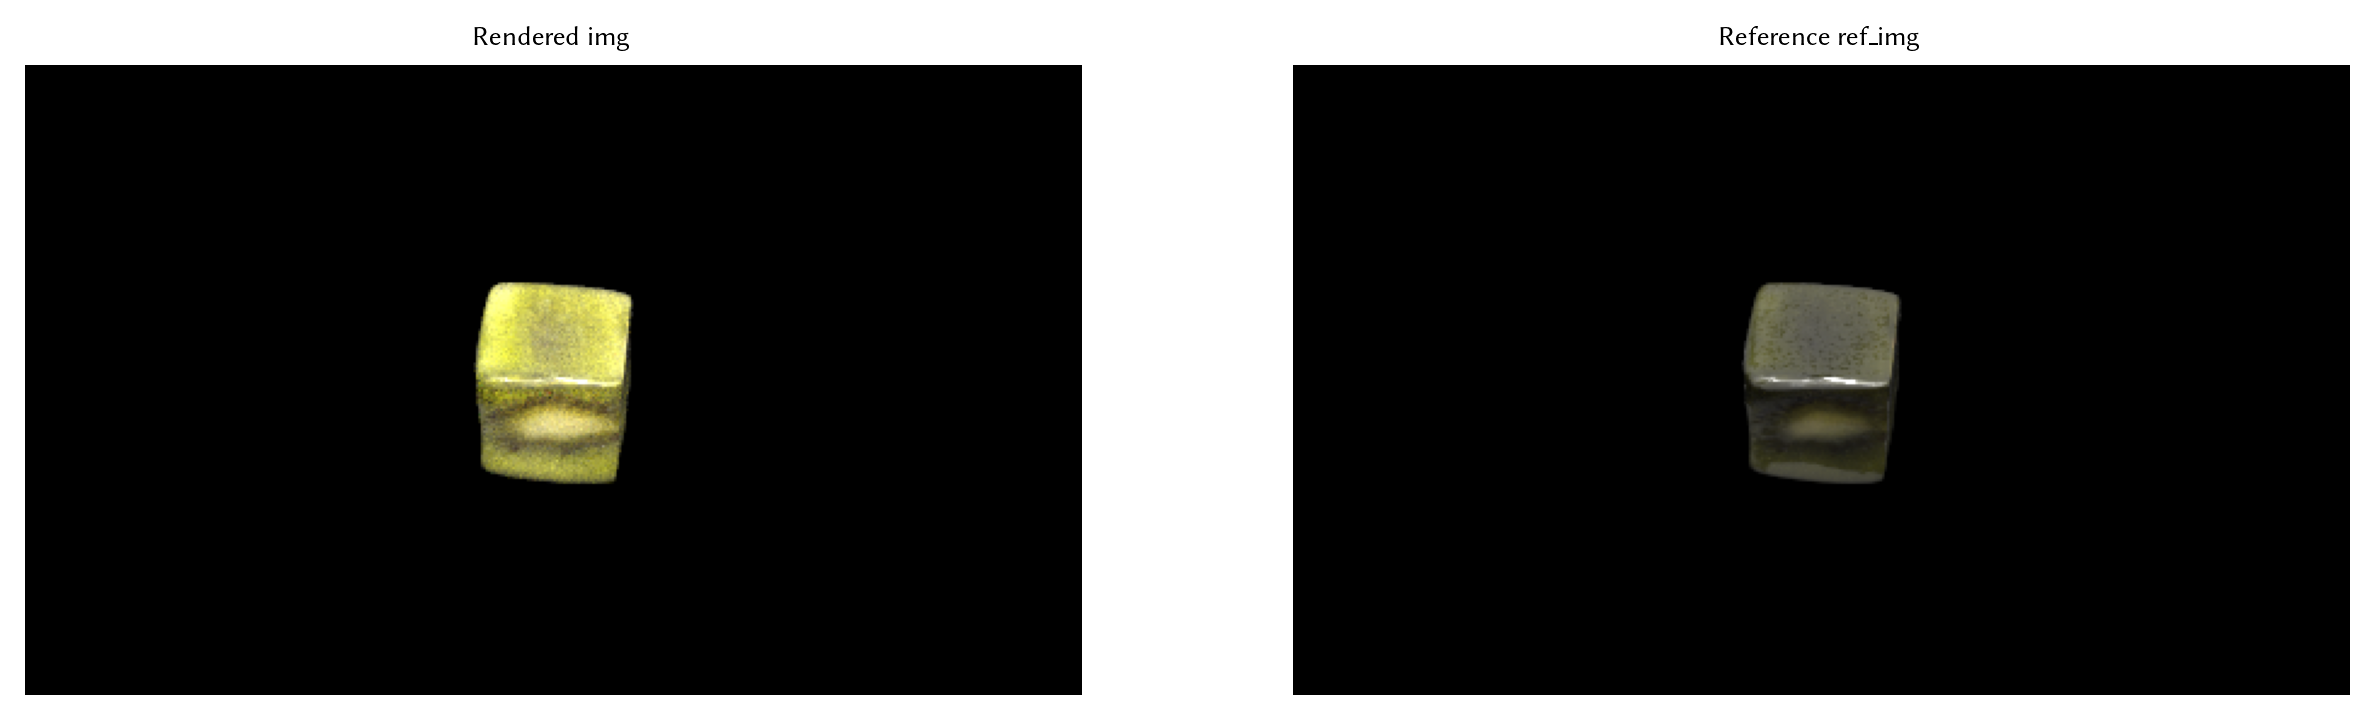

Scene[
  children = [
    HDRFilm[
      size = [436, 260],
      crop_size = [436, 260],
      crop_offset = [0, 0],
      sample_border = 0,
      compensate = 0,
      filter = BoxFilter[],
      file_format = OpenEXR,
      pixel_format = rgb,
      component_format = float32,
    ],
    IndependentSampler[
      base_seed = 0
      sample_count = 4
      samples_per_wavefront = 1
      wavefront_size = 0
    ],
    Rectangle[
      to_world = [[6.3119, -0.426124, -0.268563, 19.0994],
                  [0, 7.45839, -0.052596, 9.68172],
                  [4.05092, 0.663961, 0.418459, -29.7921],
                  [0, 0, 0, 1]],
      frame = Frame[
        s=[[12.6238, 0, 8.10183]],
        t=[[-0.852248, 14.9168, 1.32792]],
        n=[[-0.537126, -0.105192, 0.836917]]
      ],
      surface_area = [225],
      bsdf = SmoothDiffuse[
        reflectance = UniformSpectrum[value=[0]]
      ],
      emitter = AreaLight[
        radiance = SRGBReflectanceSpectrum[
          value = [[100,

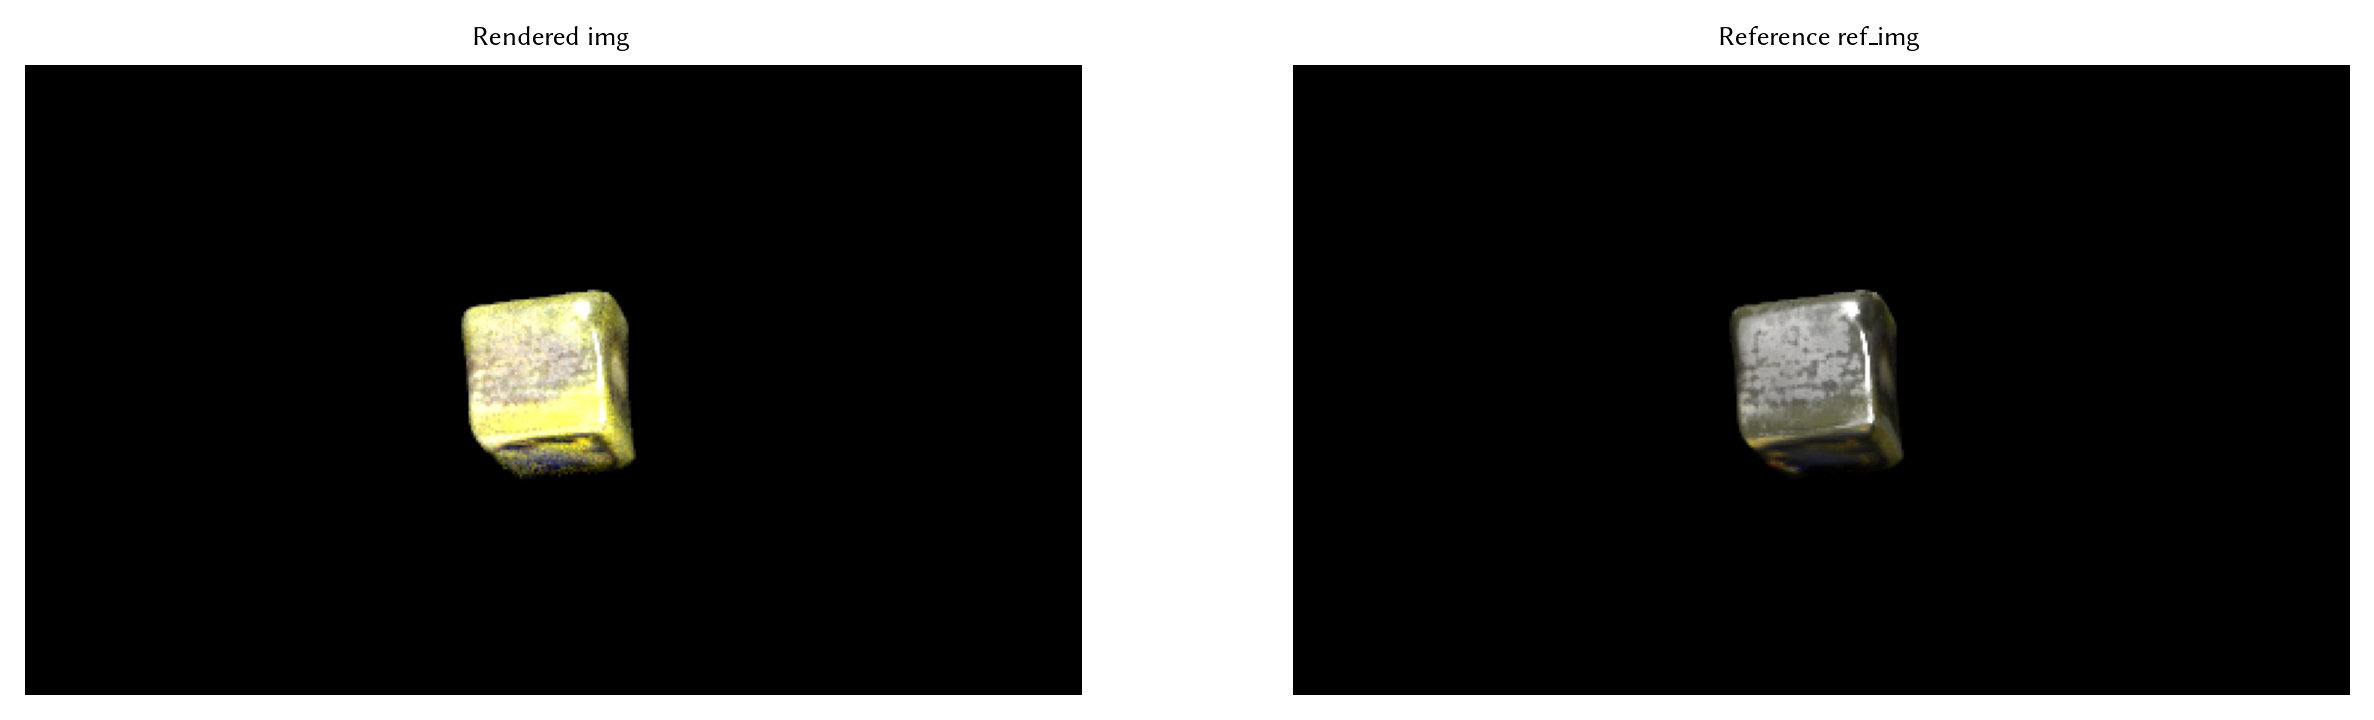

Scene[
  children = [
    HDRFilm[
      size = [436, 260],
      crop_size = [436, 260],
      crop_offset = [0, 0],
      sample_border = 0,
      compensate = 0,
      filter = BoxFilter[],
      file_format = OpenEXR,
      pixel_format = rgb,
      component_format = float32,
    ],
    IndependentSampler[
      base_seed = 0
      sample_count = 4
      samples_per_wavefront = 1
      wavefront_size = 0
    ],
    Rectangle[
      to_world = [[7.32883, 0.166872, 0.10563, -7.09407],
                  [-0, 7.45875, -0.05237, 9.6659],
                  [-1.59321, 0.76762, 0.485901, -34.5131],
                  [0, 0, 0, 1]],
      frame = Frame[
        s=[[14.6577, 0, -3.18641]],
        t=[[0.333744, 14.9175, 1.53524]],
        n=[[0.211259, -0.10474, 0.971802]]
      ],
      surface_area = [225],
      bsdf = SmoothDiffuse[
        reflectance = UniformSpectrum[value=[0]]
      ],
      emitter = AreaLight[
        radiance = SRGBReflectanceSpectrum[
          value = [[100, 100

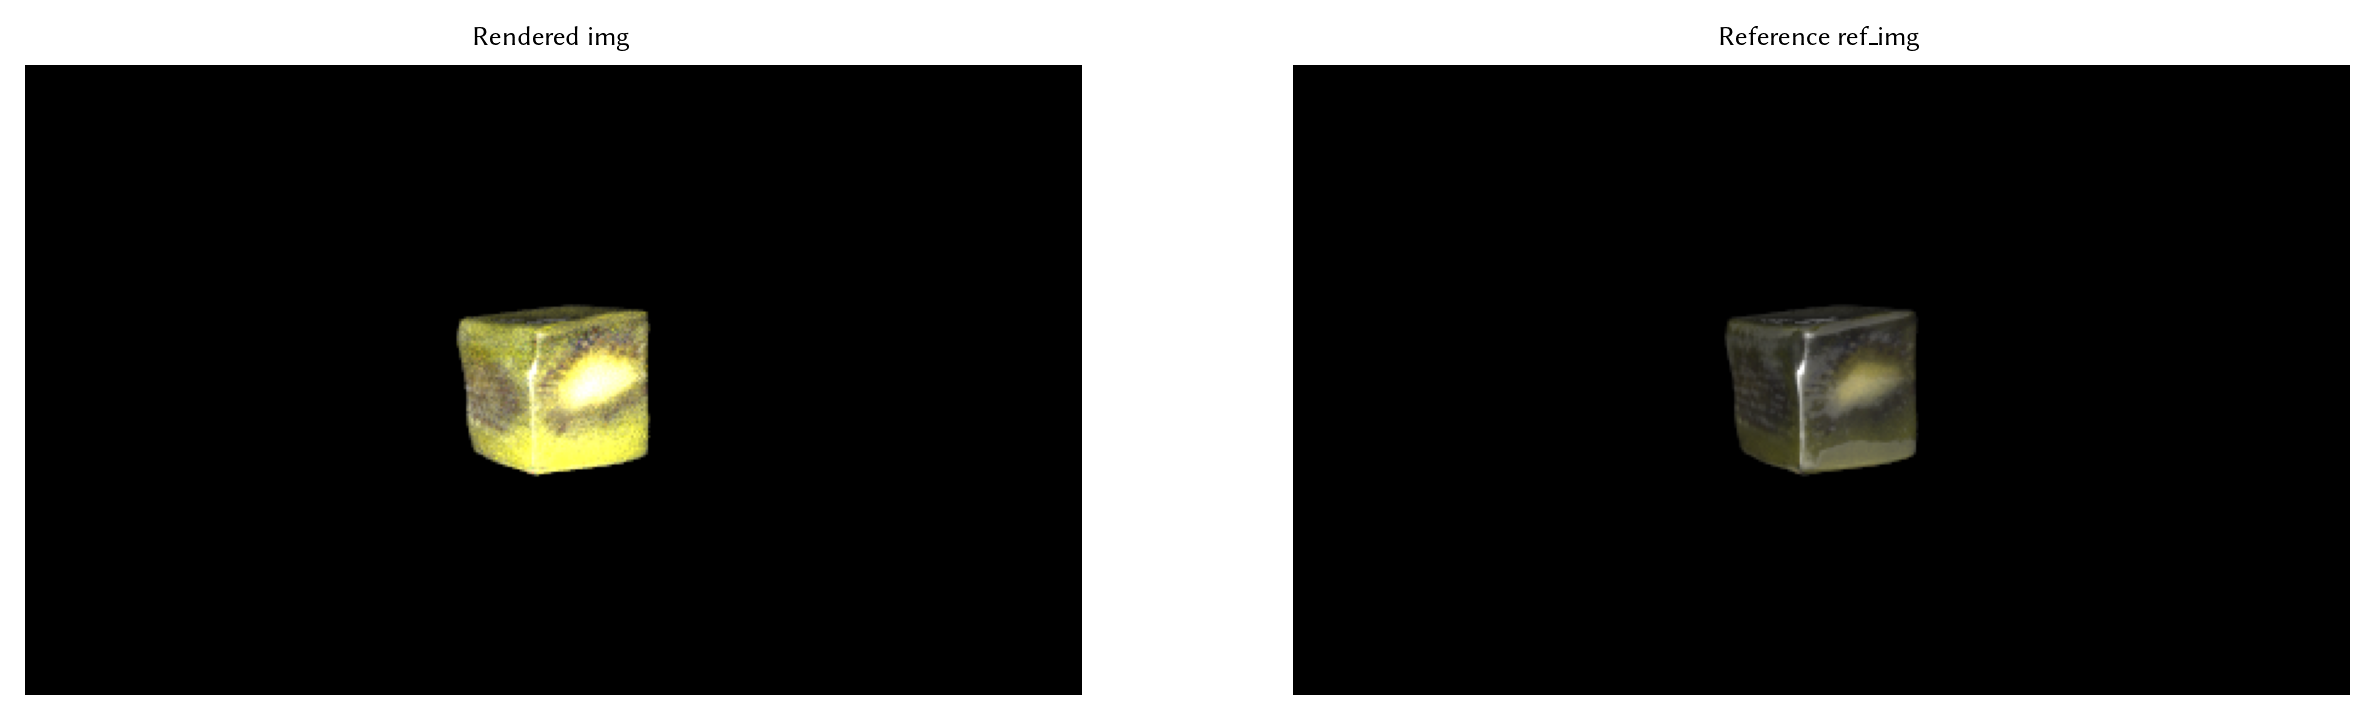

Scene[
  children = [
    HDRFilm[
      size = [436, 260],
      crop_size = [436, 260],
      crop_offset = [0, 0],
      sample_border = 0,
      compensate = 0,
      filter = BoxFilter[],
      file_format = OpenEXR,
      pixel_format = rgb,
      component_format = float32,
    ],
    IndependentSampler[
      base_seed = 0
      sample_count = 4
      samples_per_wavefront = 1
      wavefront_size = 0
    ],
    Rectangle[
      to_world = [[7.17276, -2.07285, 0.047364, -3.0155],
                  [-0, 2.43174, 0.472989, -27.1092],
                  [-2.19123, -6.78527, 0.155042, -11.353],
                  [0, 0, 0, 1]],
      frame = Frame[
        s=[[14.3455, 0, -4.38245]],
        t=[[-4.1457, 4.86348, -13.5705]],
        n=[[0.0947287, 0.945978, 0.310085]]
      ],
      surface_area = [225],
      bsdf = SmoothDiffuse[
        reflectance = UniformSpectrum[value=[0]]
      ],
      emitter = AreaLight[
        radiance = SRGBReflectanceSpectrum[
          value = [[100, 

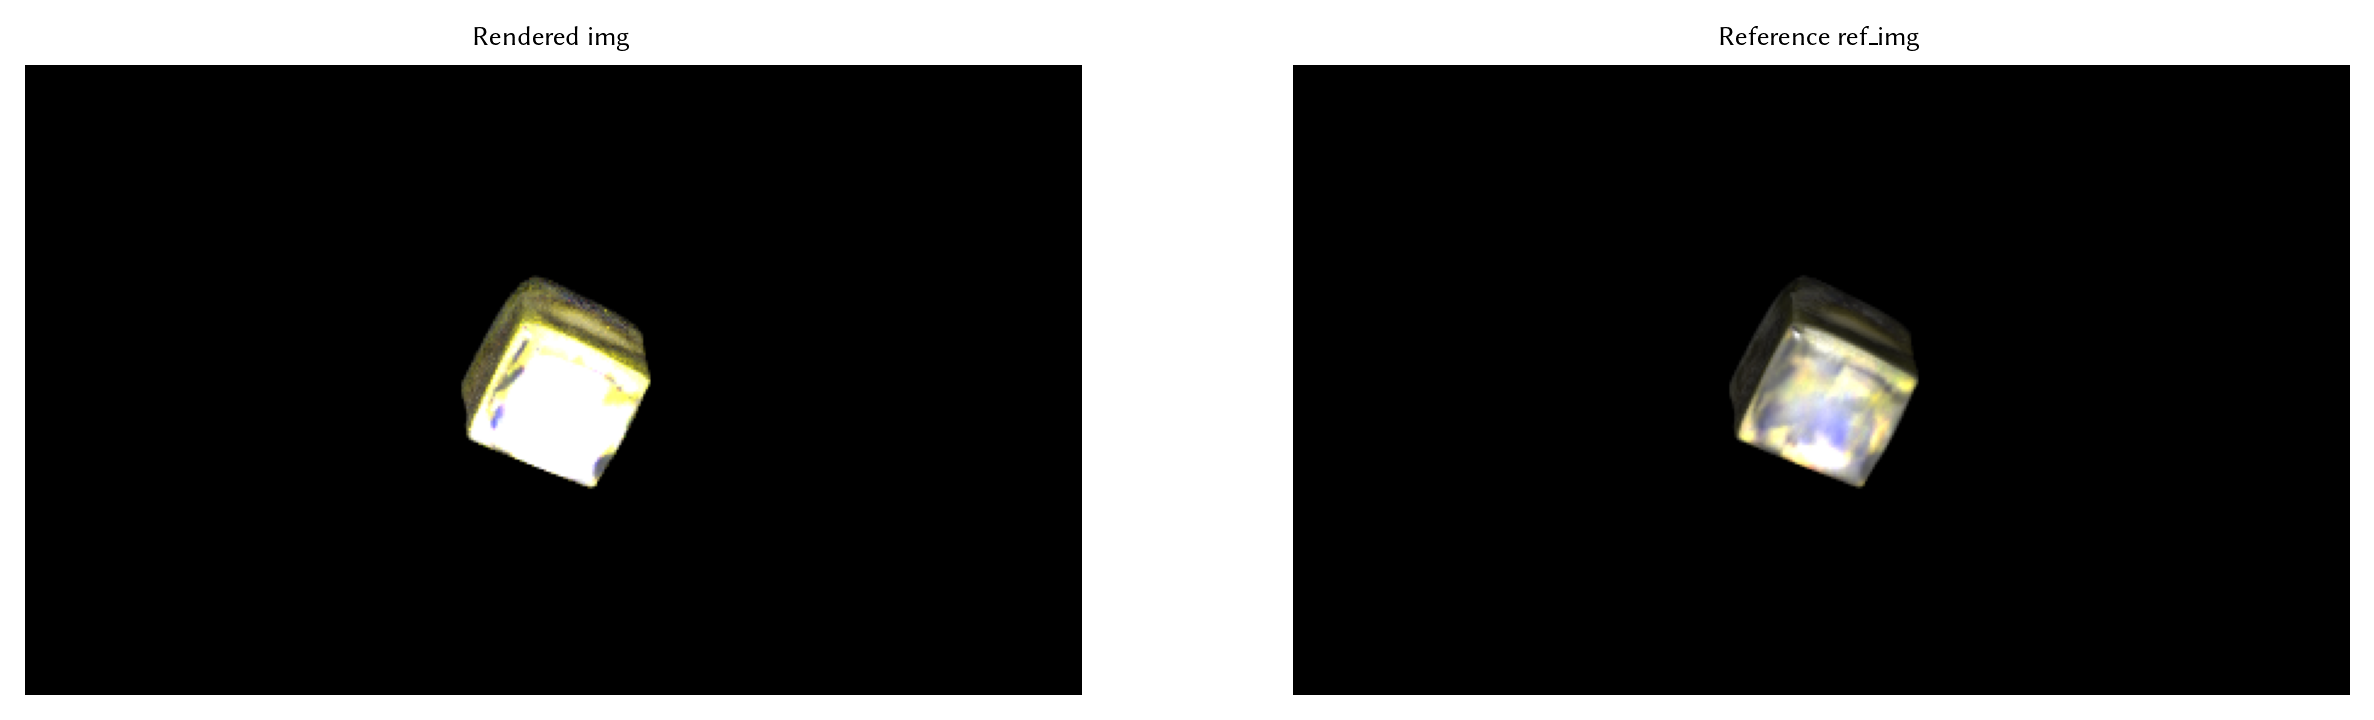

Rendering at resolution level 0 (width=436):   0%|          | 1/1024 [00:02<48:02,  2.82s/it]

Scene[
  children = [
    HDRFilm[
      size = [436, 260],
      crop_size = [436, 260],
      crop_offset = [0, 0],
      sample_border = 0,
      compensate = 0,
      filter = BoxFilter[],
      file_format = OpenEXR,
      pixel_format = rgb,
      component_format = float32,
    ],
    IndependentSampler[
      base_seed = 0
      sample_count = 4
      samples_per_wavefront = 1
      wavefront_size = 0
    ],
    Rectangle[
      to_world = [[7.11702, -1.74065, -0.106836, 7.77849],
                  [-0, 5.07986, -0.367846, 31.7492],
                  [2.36601, 5.23594, 0.321365, -22.9955],
                  [0, 0, 0, 1]],
      frame = Frame[
        s=[[14.234, 0, 4.73202]],
        t=[[-3.48131, 10.1597, 10.4719]],
        n=[[-0.213671, -0.735693, 0.642729]]
      ],
      surface_area = [225],
      bsdf = SmoothDiffuse[
        reflectance = UniformSpectrum[value=[0]]
      ],
      emitter = AreaLight[
        radiance = SRGBReflectanceSpectrum[
          value = [[100, 1

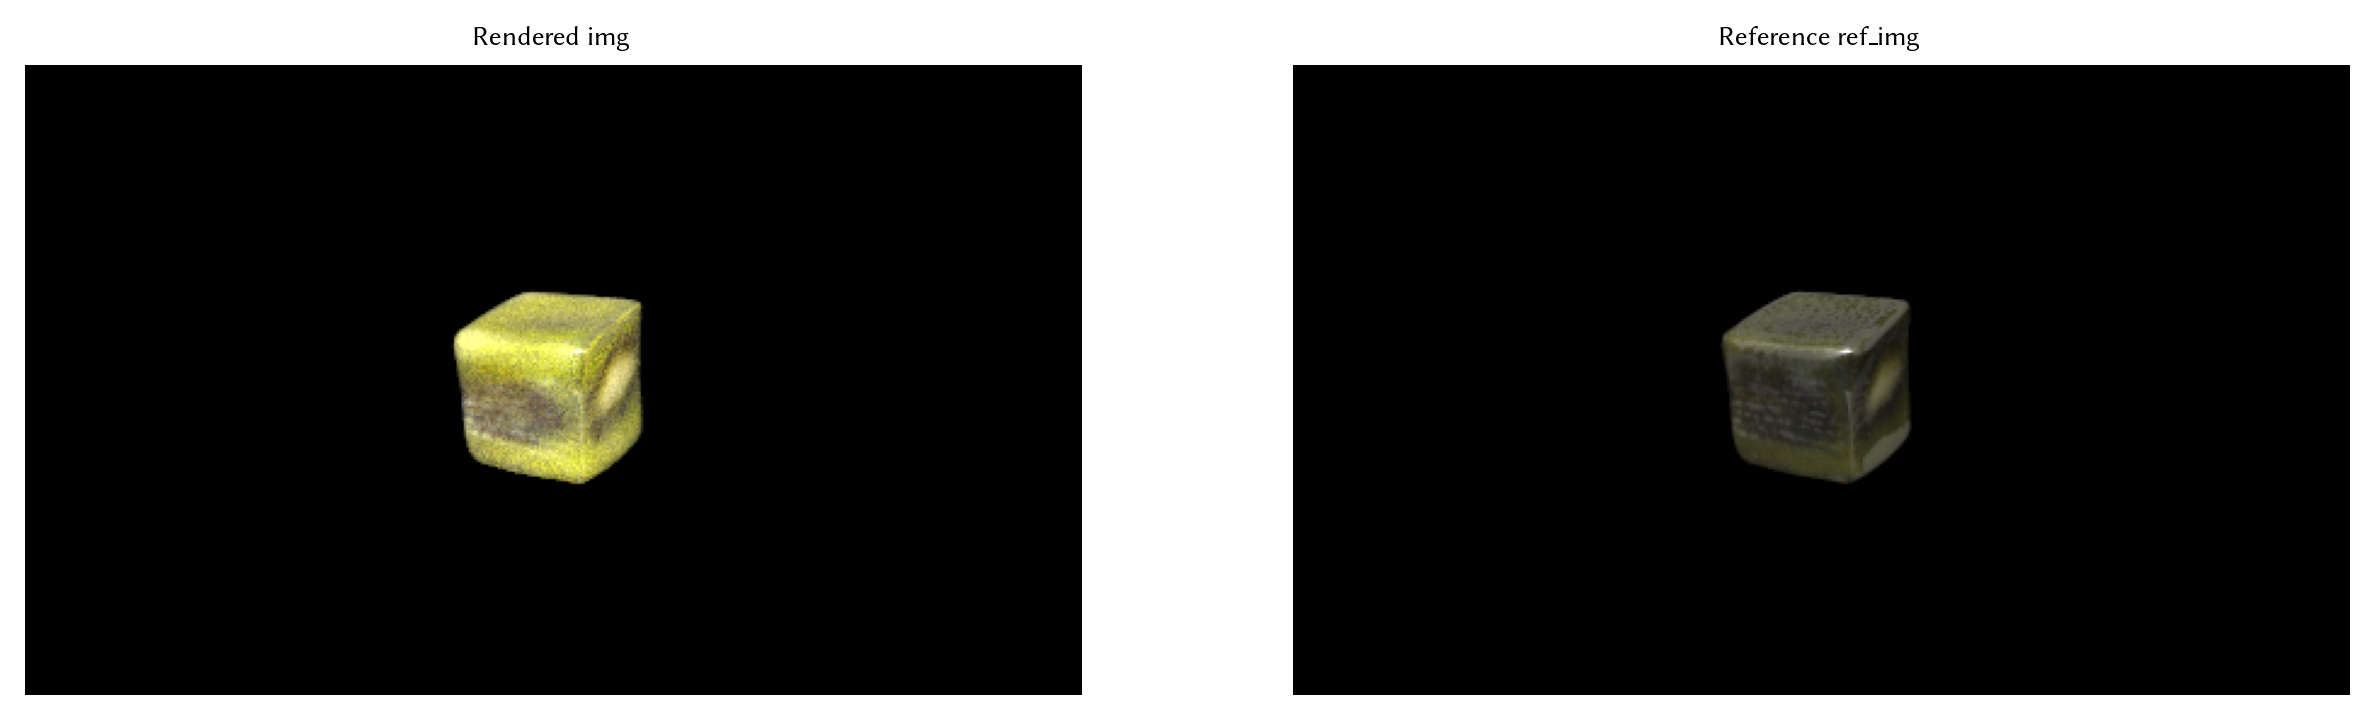

Scene[
  children = [
    HDRFilm[
      size = [436, 260],
      crop_size = [436, 260],
      crop_offset = [0, 0],
      sample_border = 0,
      compensate = 0,
      filter = BoxFilter[],
      file_format = OpenEXR,
      pixel_format = rgb,
      component_format = float32,
    ],
    IndependentSampler[
      base_seed = 0
      sample_count = 4
      samples_per_wavefront = 1
      wavefront_size = 0
    ],
    Rectangle[
      to_world = [[4.24115, -3.14376, 0.355149, -24.5604],
                  [-0, 6.45915, 0.254116, -11.7881],
                  [-6.18568, -2.15549, 0.243504, -17.5453],
                  [0, 0, 0, 1]],
      frame = Frame[
        s=[[8.4823, 0, -12.3714]],
        t=[[-6.28751, 12.9183, -4.31098]],
        n=[[0.710298, 0.508232, 0.487009]]
      ],
      surface_area = [225],
      bsdf = SmoothDiffuse[
        reflectance = UniformSpectrum[value=[0]]
      ],
      emitter = AreaLight[
        radiance = SRGBReflectanceSpectrum[
          value = [[100,

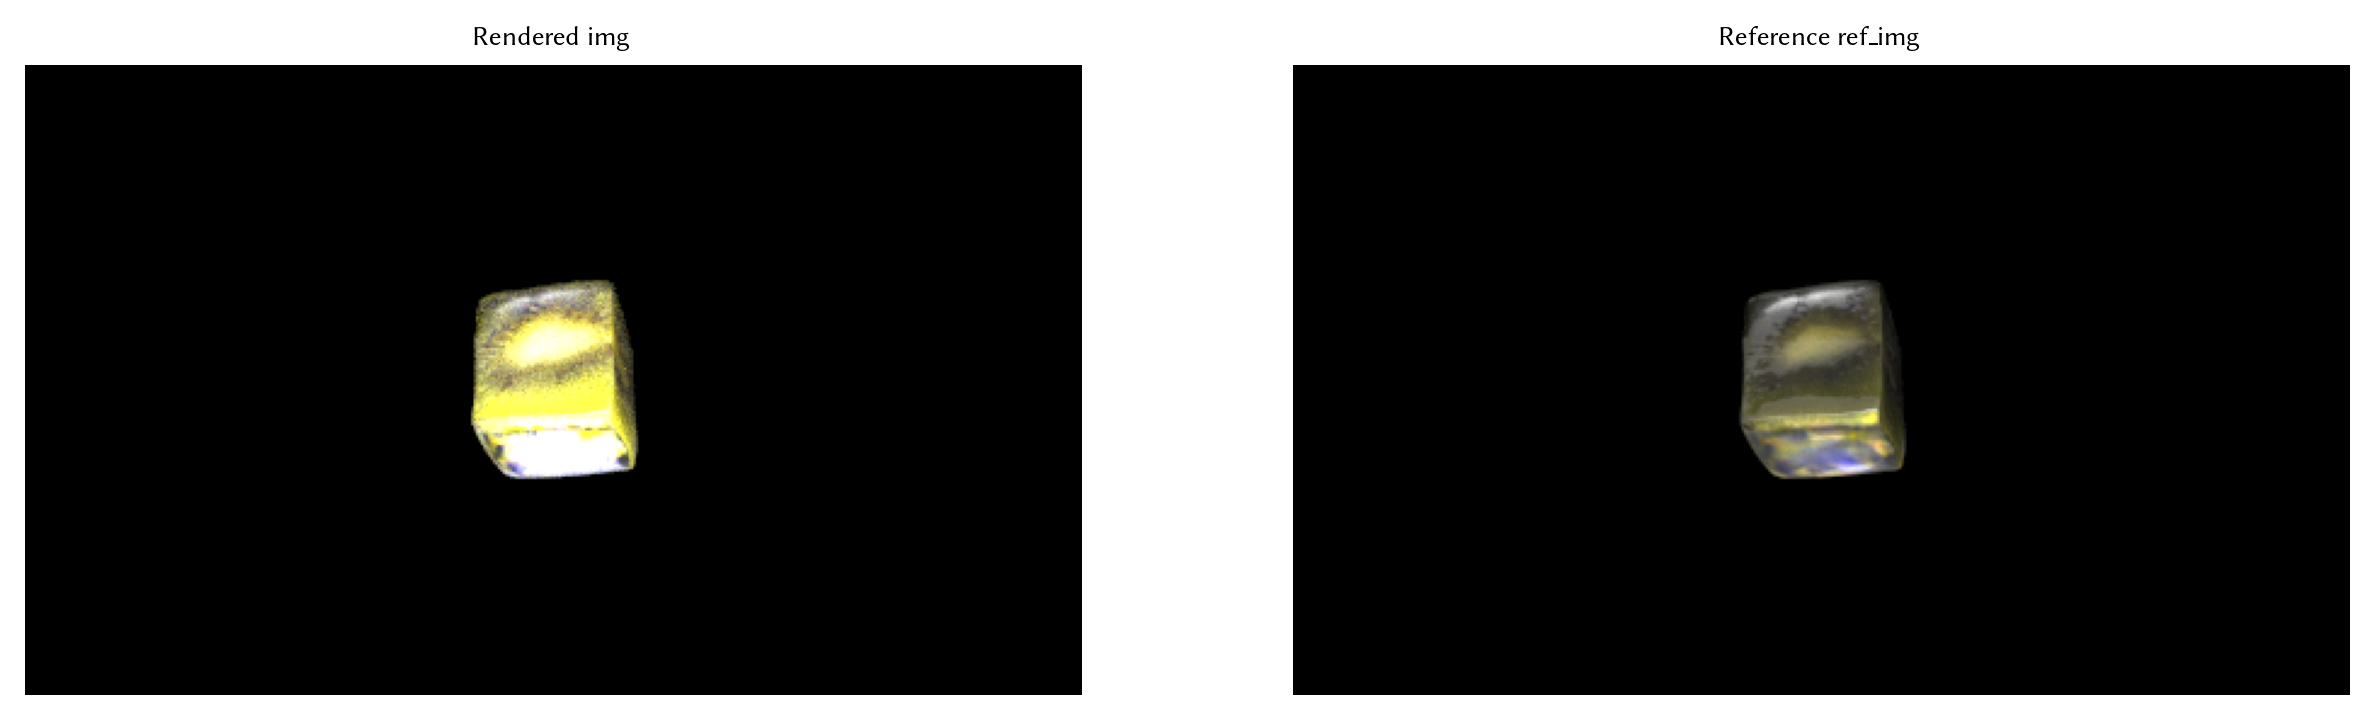

Scene[
  children = [
    HDRFilm[
      size = [436, 260],
      crop_size = [436, 260],
      crop_offset = [0, 0],
      sample_border = 0,
      compensate = 0,
      filter = BoxFilter[],
      file_format = OpenEXR,
      pixel_format = rgb,
      component_format = float32,
    ],
    IndependentSampler[
      base_seed = 0
      sample_count = 4
      samples_per_wavefront = 1
      wavefront_size = 0
    ],
    Rectangle[
      to_world = [[2.71416, 5.18368, -0.312785, 22.195],
                  [1e-06, 5.0329, 0.370705, -19.9493],
                  [6.99166, -2.0123, 0.121423, -8.9996],
                  [0, 0, 0, 1]],
      frame = Frame[
        s=[[5.42831, 2e-06, 13.9833]],
        t=[[10.3674, 10.0658, -4.0246]],
        n=[[-0.62557, 0.741409, 0.242846]]
      ],
      surface_area = [225],
      bsdf = SmoothDiffuse[
        reflectance = UniformSpectrum[value=[0]]
      ],
      emitter = AreaLight[
        radiance = SRGBReflectanceSpectrum[
          value = [[100, 

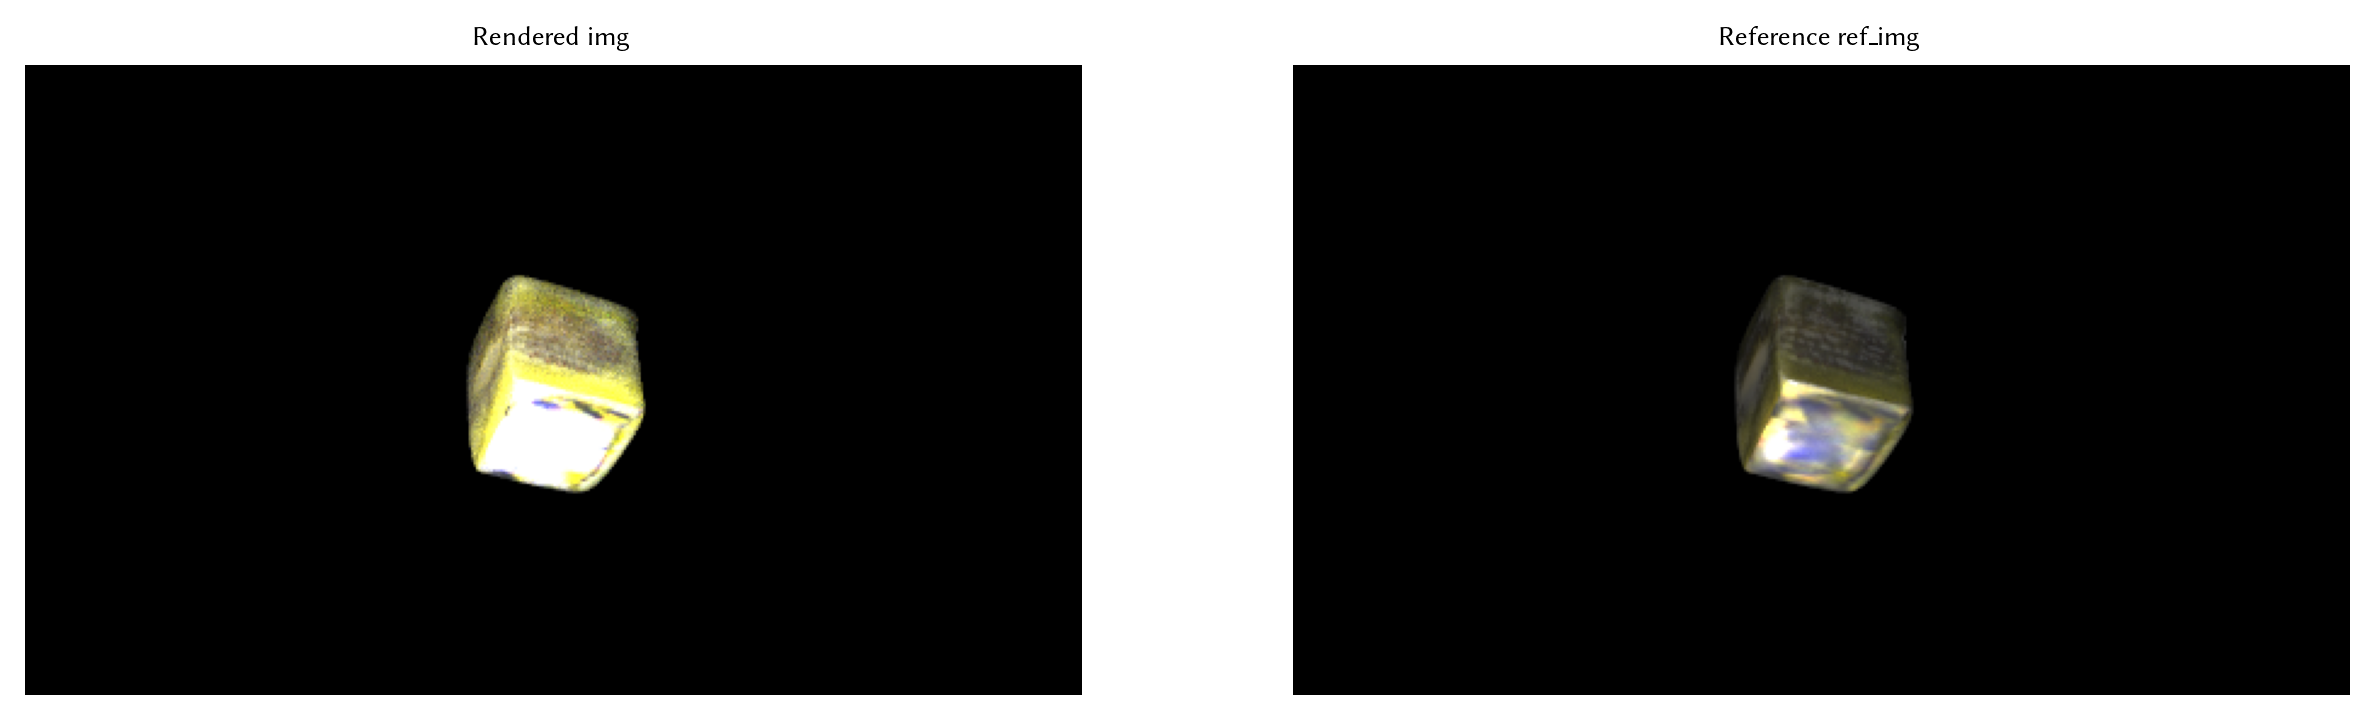

Scene[
  children = [
    HDRFilm[
      size = [436, 260],
      crop_size = [436, 260],
      crop_offset = [0, 0],
      sample_border = 0,
      compensate = 0,
      filter = BoxFilter[],
      file_format = OpenEXR,
      pixel_format = rgb,
      component_format = float32,
    ],
    IndependentSampler[
      base_seed = 0
      sample_count = 4
      samples_per_wavefront = 1
      wavefront_size = 0
    ],
    Rectangle[
      to_world = [[7.31645, 0.928876, 0.090842, -6.05894],
                  [-0, 6.19711, -0.281629, 25.714],
                  [-1.64911, 4.12105, 0.40303, -28.7121],
                  [0, 0, 0, 1]],
      frame = Frame[
        s=[[14.6329, 0, -3.29823]],
        t=[[1.85775, 12.3942, 8.2421]],
        n=[[0.181684, -0.563258, 0.806059]]
      ],
      surface_area = [225],
      bsdf = SmoothDiffuse[
        reflectance = UniformSpectrum[value=[0]]
      ],
      emitter = AreaLight[
        radiance = SRGBReflectanceSpectrum[
          value = [[100, 100

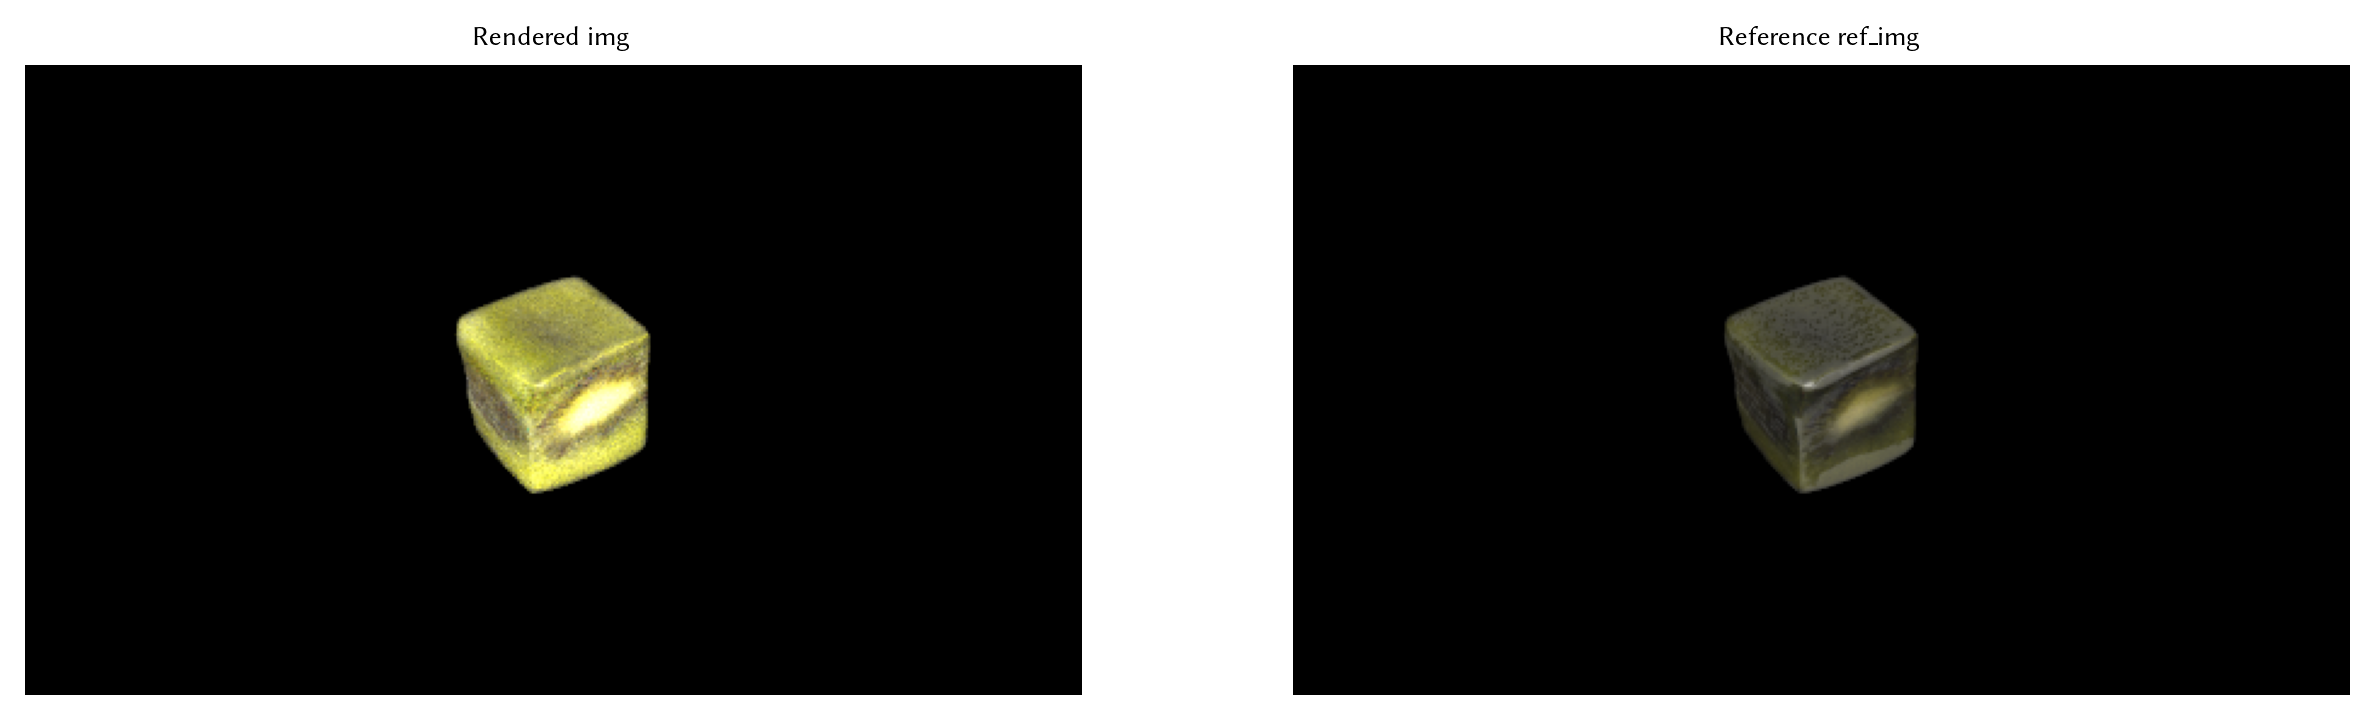

Rendering at resolution level 0 (width=436):   0%|          | 2/1024 [00:05<42:38,  2.50s/it]

Scene[
  children = [
    HDRFilm[
      size = [436, 260],
      crop_size = [436, 260],
      crop_offset = [0, 0],
      sample_border = 0,
      compensate = 0,
      filter = BoxFilter[],
      file_format = OpenEXR,
      pixel_format = rgb,
      component_format = float32,
    ],
    IndependentSampler[
      base_seed = 0
      sample_count = 4
      samples_per_wavefront = 1
      wavefront_size = 0
    ],
    Rectangle[
      to_world = [[7.49468, 0.133494, -0.016586, 1.46101],
                  [0, 6.60873, 0.236406, -10.5484],
                  [0.282341, -3.54357, 0.44027, -31.3189],
                  [0, 0, 0, 1]],
      frame = Frame[
        s=[[14.9894, 0, 0.564682]],
        t=[[0.266988, 13.2175, -7.08714]],
        n=[[-0.0331718, 0.472811, 0.880539]]
      ],
      surface_area = [225],
      bsdf = SmoothDiffuse[
        reflectance = UniformSpectrum[value=[0]]
      ],
      emitter = AreaLight[
        radiance = SRGBReflectanceSpectrum[
          value = [[100

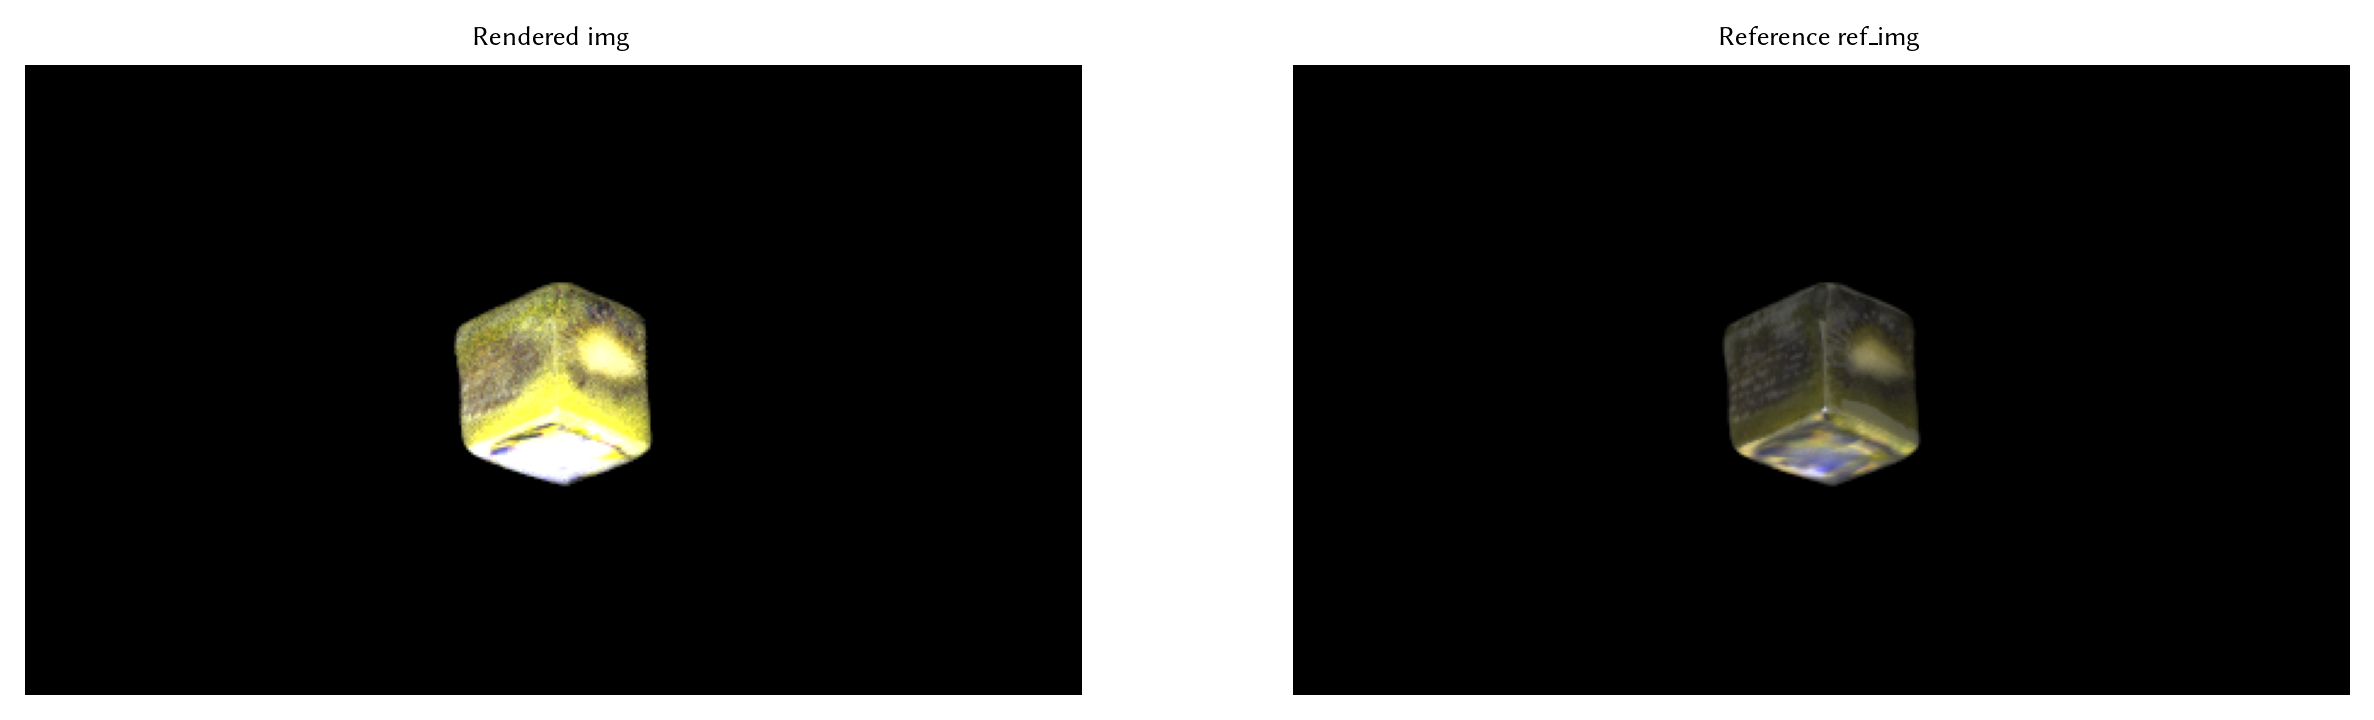

In [ ]:
if technique == 'gradient_filtering':
    gin_config_name = f'{scene_name}/naive'
else:
    gin_config_name = f'{scene_name}/{technique}'

print(f'Next result location: {result_folder}')

optimization_cli.run_config(gin_config_name, override_bindings, sss_config=True)

In [ ]:
# Figure setup

def figure_grid_setup(
    fig_width,
    image_shape,
    image_crop_shape,
    inner_hspace=0.0,
    inner_wspace=0.0,
    outer_space=0.1,
):
  # Image aspect ratios
  h, w = image_shape
  h_crop, w_crop = image_crop_shape
  r = w / h
  r_crop = w_crop / h_crop

  # Spacing in the inner gridspec
  inner_wspace = inner_hspace
  # same vertical spacing as horizontal spacing
  inner_hspace = inner_wspace
  inner_rows = 2
  inner_cols = 3
  inner_height_ratios = [h_crop, h_crop]
  inner_width_ratios = [w_crop, w_crop, w_crop]
  inner_aspect = figutils.gridspec_aspect(
      n_rows=inner_rows,
      n_cols=inner_cols,
      w=inner_width_ratios,
      h=inner_height_ratios,
      wspace=inner_wspace,
      hspace=inner_hspace,
  )
  # Spacing in the main griddpec
  outer_rows = 2
  outer_cols = 1
  outer_wspace = 0
  outer_hspace = outer_space
  # If width is 1, we need the sum of the inverses for the height (single column)
  # If height is 1, we need the sum for the width (single row)
  outer_aspect = figutils.gridspec_aspect(
      n_rows=outer_rows,
      n_cols=outer_cols,
      w=[1],
      h=[1 / inner_aspect, 1 / r],
      wspace=outer_wspace,
      hspace=outer_hspace,
  )
  outer_aspect *= 0.98

  fig = plt.figure(1, figsize=(fig_width, fig_width / outer_aspect))

  outer_gs = fig.add_gridspec(
      outer_rows,
      outer_cols,
      hspace=outer_hspace,
      wspace=outer_wspace,
      height_ratios=[1 / inner_aspect, 1 / r],
      width_ratios=[1],
  )

  inner_gs = gridspec.GridSpecFromSubplotSpec(
      inner_rows,
      inner_cols,
      subplot_spec=outer_gs[0],
      wspace=inner_wspace,
      hspace=inner_hspace,
      width_ratios=inner_width_ratios,
      height_ratios=inner_height_ratios,
  )
  return (
      fig,
      outer_gs,
      inner_gs,
      inner_rows,
      inner_cols,
  )

In [ ]:
FIGURE_DIR = "figures/pdfs"
FIGURE_NAME = "volume_gradients"

ref_crop_offset = (26, 22)
ref_crop_size = (739, 432)

grad_crop_offset = (18, 13)
grad_crop_size = (363, 215)

cropped_ref_image = figutils.crop_image(ref_image,ref_crop_offset,ref_crop_size)
cropped_forward_images = [figutils.crop_image(im,grad_crop_offset,grad_crop_size) for im in forward_images]
cropped_fd_images = [figutils.crop_image(im,grad_crop_offset,grad_crop_size) for im in fd_images]

titles = [
    "Albedo",
    "Extinction",
    "Phase function (HG)",
    r"\textsc{Dragon}",
]
row_titles = ["Our forward", "Finite diff."]

params_label = [
    r"$\rho=[0.2, 0.4, 0.95]$",
    r"$\sigma_t=[15,7,5]$",
    r"$g=[-0.5, -0.2, 0.1]$",
]

(
    fig,
    outer_gs,
    inner_gs,
    inner_rows,
    inner_cols,
) = figure_grid_setup(
    figutils.COLUMN_WIDTH,
    ref_image.shape[:2],
    cropped_forward_images[0].shape[:2],
    inner_hspace=0.02,
    inner_wspace=0.02,
    outer_space=0.0,
)

title_pad = 3
label_pad = 2
line_width = 0.75

strengths = [4.5, 4.5, 4.5]
# Grads
if True:
  for row in range(inner_rows):
    for col in range(inner_cols):
      ax = fig.add_subplot(inner_gs[row, col])
      figutils.disable_ticks(ax)
      if col == 0:
        ax.set_ylabel(row_titles[row], labelpad=label_pad)
      # Our
      if row == 0:
        ax.set_title(titles[col], pad=title_pad)
        im = ax.imshow(
            cropped_forward_images[col],
            cmap=cm.coolwarm,
            vmin=-forward_vlims[col] * strengths[col],
            vmax=forward_vlims[col] * strengths[col],
        )
      elif row == 1:
        im = ax.imshow(
            cropped_fd_images[col],
            cmap=cm.coolwarm,
            vmin=-forward_vlims[col] * strengths[col],
            vmax=forward_vlims[col] * strengths[col],
        )

# Reference
if True:
  ax = fig.add_subplot(outer_gs[1])
  im = ax.imshow(cropped_ref_image)
  ax.set_ylabel(titles[-1], labelpad=label_pad)
  # ax.set_title(r"\vspace{250px}" + r"\;\;\;\;\;\;\;\;\;".join(params_label),pad=0)
  ax.set_xlabel(r"\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;".join(params_label),labelpad=label_pad)
  figutils.disable_ticks(ax)

  ax = fig.add_subplot(outer_gs[0])
  ax.axis('off')
  # Create an inset axes
  inset = inset_axes(
      ax,  # Parent axes
      width="1%",  # Width of the inset in percentage of the parent axis
      height="99.19%",  # Height of the inset in percentage of the parent axis
      loc="lower left",  # Location inside the parent axis
      bbox_to_anchor=(1.005, 0.005, 1, 1),  # Bounding box adjustment
      bbox_transform=ax.transAxes,  # Use axes coordinates
      borderpad=0,
  )  # Padding

  # Create the colorbar
  cbar = fig.colorbar(
      cm.ScalarMappable(
          norm=Normalize(
              vmin=-np.max(forward_vlims), vmax=np.max(forward_vlims)
          ),
          cmap=cm.coolwarm,
      ),
      cax=inset,
      orientation="vertical",
  )
  cbar.ax.yaxis.set_label_position("left")  # Move label to the left
  # cbar.ax.yaxis.tick_left()  # Move ticks to the left side
  cbar.set_label("Parameter gradient", labelpad=-9)
  ticks = [cbar.vmin, cbar.vmax]
  cbar.set_ticks(ticks)
  # cbar.set_ticklabels([f"{x:.2f}" for x in ticks])
  cbar.set_ticklabels(["neg", "pos"])
  cbar.ax.tick_params(pad=1.8, length=0)

# fig.tight_layout()
figutils.force_post_crop_size(fig, figutils.COLUMN_WIDTH)

In [ ]:
figutils.savefig(
    fig,
    name=Path(FIGURE_NAME),
    fig_directory=Path(FIGURE_DIR),
    dpi=300,
    pad_inches=0.005,
    bbox_inches="tight",
    compress=False,
    target_width=figutils.COLUMN_WIDTH,
    backend=None,
)